# 机器学习纳米学位
## 非监督学习
## 项目 3: 创建用户分类

欢迎来到机器学习工程师纳米学位的第三个项目！在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**'TODO'**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

在这个项目中，你将分析一个数据集的内在结构，这个数据集包含很多客户真对不同类型产品的年度采购额（用**金额**表示）。这个项目的任务之一是如何最好地描述一个批发商不同种类顾客之间的差异。这样做将能够使得批发商能够更好的组织他们的物流服务以满足每个客户的需求。

这个项目的数据集能够在[UCI机器学习信息库](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)中找到.因为这个项目的目的，分析将不会包括'Channel'和'Region'这两个特征——重点集中在6个记录的客户购买的产品类别上。

运行下面的的代码单元以载入整个客户数据集和一些这个项目需要的Python库。如果你的数据集载入成功，你将看到后面输出数据集的大小。

In [2]:
# 引入这个项目需要的库
import numpy as np
import pandas as pd
import visuals as vs
from IPython.display import display # 使得我们可以对DataFrame使用display()函数

# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline

# 载入整个客户数据集
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## 分析数据
在这部分，你将开始分析数据，通过可视化和代码来理解每一个特征和其他特征的联系。你会看到关于数据集的统计描述，考虑每一个属性的相关性，然后从数据集中选择若干个样本数据点，你将在整个项目中一直跟踪研究这几个数据点。

运行下面的代码单元给出数据集的一个统计描述。注意这个数据集包含了6个重要的产品类型：**'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**和 **'Delicatessen'**。想一下这里每一个类型代表你会购买什么样的产品。

In [3]:
# 显示数据集的一个描述
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 练习: 选择样本
为了对客户有一个更好的了解，并且了解代表他们的数据将会在这个分析过程中如何变换。最好是选择几个样本数据点，并且更为详细地分析它们。在下面的代码单元中，选择**三个**索引加入到索引列表`indices`中，这三个索引代表你要追踪的客户。我们建议你不断尝试，直到找到三个明显不同的客户。

In [9]:
# TODO：从数据集中选择三个你希望抽样的数据点的索引
indices = [190,62,429]

# 为选择的样本建立一个DataFrame
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16936,6250,1981,7332,118,64
1,7823,6245,6544,4154,4074,964
2,8607,1750,3580,47,84,2501


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
190   75.2  69.5     20.2    89.3              11.7           5.2
62    47.3  69.3     60.0    78.6              76.1          50.0
429   50.9  27.7     42.5     1.4               8.0          85.5


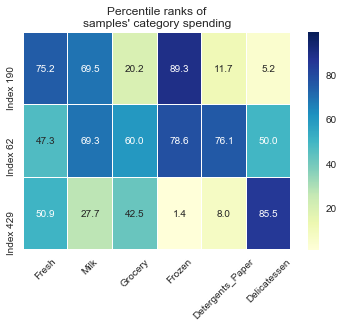

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

### 问题 1
*在你看来你选择的这三个样本点分别代表什么类型的企业（客户）？*对每一个你选择的样本客户，通过它在每一种产品类型上的花费与数据集的统计描述进行比较，给出你做上述判断的理由。


**提示：** 企业的类型包括超市、咖啡馆、零售商以及其他。注意不要使用具体企业的名字，比如说在描述一个餐饮业客户时，你不能使用麦当劳。

**回答:** 我之所以选择这3个客户的特别<br />

- 客户1：生鲜(Fresh)花费比较多，Fresh，Frozen在整体数据集中在3/4分位之上，且Milk和Grocery也超过了中位数和平均值，但是Detergents_Paper和Delicatessen就非常低了，低于了1/4分位，所以预计是大型生鲜超市
- 客户2：且整体数据相对比较均衡，如Frozen,Milk,Detergents_Paper在在3/4的分位左右，其他三个都是中位数左右，从形态上看，比较均衡，应该是餐厅之类客户
- 客户3：熟食(Delicatessen)和牛奶(Milk)花费比较多大于3/4分为，而Frozen和Detergennts_Paper非常少，基本上接近于最小值，而其他两个数值都比较接近中位数，预计是零食商客户，因为基本上无冷冻和洗涤

从上面的热力图可以很容易地看出我选出的这三个样本数据在整体数据集中的分布

### 练习: 特征相关性
一个有趣的想法是，考虑这六个类别中的一个（或者多个）产品类别，是否对于理解客户的购买行为具有实际的相关性。也就是说，当用户购买了一定数量的某一类产品，我们是否能够确定他们必然会成比例地购买另一种类的产品。通过简单地使用监督学习的算法，我们能够通过在移除某一个特征的数据子集上构建一个有监督的回归学习器，然后判断这个模型对于移除特征的预测得分，通过这种方法我们能检验上面的假设。

在下面的代码单元中，你需要实现以下的功能：
 - 使用`DataFrame.drop`函数移除数据集中你选择的不需要的特征，并将移除后的结果赋值给`new_data`。
 - 使用`sklearn.model_selection.train_test_split`将数据集分割成训练集和测试集。
   - 使用移除的特征作为你的目标标签。设置`test_size`为`0.25`并设置一个`random_state`。
 - 导入一个DecisionTreeRegressor（决策树回归器），设置一个`random_state`，然后用训练集训练它。
 - 使用回归器的`score`函数输出模型在测试集上的预测得分。

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone

# TODO：为DataFrame创建一个副本，用'drop'函数丢弃一些指定的特征
new_data = data.drop(['Milk'], axis = 1)

# TODO：使用给定的特征作为目标，将数据分割成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, new_data, test_size=0.25, random_state=88)

# TODO：创建一个DecisionTreeRegressor（决策树回归器）并在训练集上训练它
clf = DecisionTreeRegressor(random_state=80)
params={'max_depth':[2,3,4,5,6,7,8,9,10,12]}
regressor=GridSearchCV(clf,params).fit(X_train,y_train)
reg_best=regressor.best_estimator_

from sklearn.base import clone
clf_best=(clone(reg_best)).fit(X_train,y_train)
score = clf_best.score(X_test,y_test)

clf_best=(clone(reg_best)).fit(X_train,y_train)
score = clf_best.score(X_test,y_test)
print "regressor score is: ",score

regressor score is:  0.845656237583


### 问题 2
*你尝试预测哪一个特征？预测的得分是多少？这个特征对于区分用户的消费习惯来说必要吗？*  
**提示：** 决定系数（coefficient of determination）, `R^2`,结果在0到1之间，1表示完美拟合，一个负的`R^2`表示模型不能够拟合数据。

**回答:** 我尝试预测的是牛奶（Milk),预测的R^2得分是0.85左右，对 R^2来说数字越大越好，等于1就表示完美拟合，由于得出的值比较接近于1了，那么说明绝大部分情况下，利用其他属性就能直接预测出Milk这个值，既然这个值就可能被预测出来，那说明这个特征对消费习惯来说不必要。

### 可视化特征分布
为了能够对这个数据集有一个更好的理解，我们可以对数据集中的每一个产品特征构建一个散布矩阵（scatter matrix）。如果你发现你在上面尝试预测的特征对于区分一个特定的用户来说是必须的，那么这个特征和其它的特征可能不会在下面的散射矩阵中显示任何关系。相反的，如果你认为这个特征对于识别一个特定的客户是没有作用的，那么通过散布矩阵可以看出在这个数据特征和其它特征中有关联性。运行下面的代码以创建一个散布矩阵。

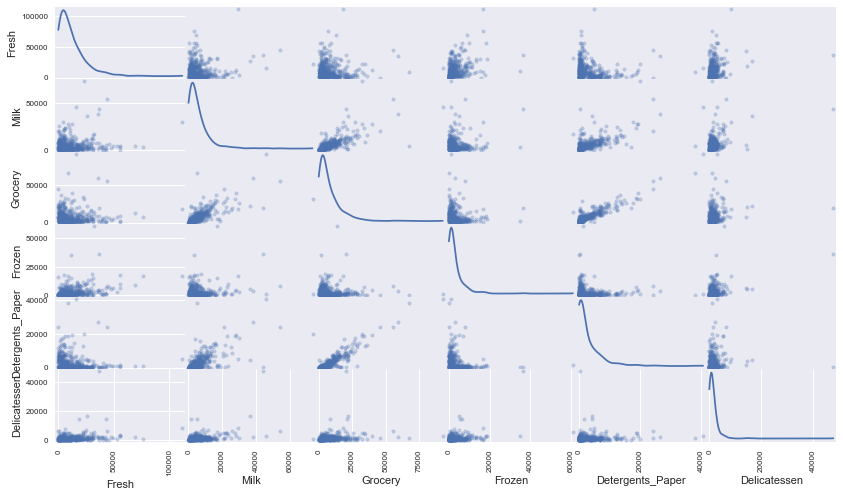

In [34]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

量化一下特征之间的匹配度，可以得出一下信息

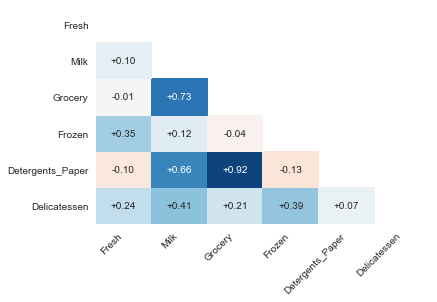

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)
    plt.xticks(rotation=45, ha='right');

### 问题 3
*这里是否存在一些特征他们彼此之间存在一定程度相关性？这个结果是验证了还是否认了你尝试预测的那个特征的相关性？这些特征的数据是怎么分布的？*

**提示：** 这些数据是正态分布(normally distributed)的吗？大多数的数据点分布在哪？

**回答:** 从图上看出，如果两个特征相关的话，那么就会**出现一台很明显的直斜线，然后点会围绕这根斜线两端靠近直线**。另外，如果点分布越靠近这根斜线，那么这两个条件就越相关。<br />
那么根据这个结果看，Grocery和Detergents_Paper 是最接近直线的，在后面的特征关联度图中也是最高的，所以Grocery和Detergents Paper是非常直接相关的。<br />
另外， Milk 和 Grocery和Detergents_Paper 也比较近似于直斜线，在后面的特征关联度图中也是最高也是比较高的，所以他们之间也是比较相关的。<br />
其他特征在图上暂时看不出相关性 <br />
我尝试的是Milk,这个特征数据和 Grocery和Detergents_Paper 是相关的。<br />
另外 数据不是正态分布, 是严重的左偏态分布，大多数数据分布在数值小的部分，这也是为什么后面要做对数缩放的原因<br />

## 数据预处理
在这个部分，你将通过在数据上做一个合适的缩放，并检测异常点（你可以选择性移除）将数据预处理成一个更好的代表客户的形式。预处理数据是保证你在分析中能够得到显著且有意义的结果的重要环节。

### 练习: 特征缩放
如果数据不是正态分布的，尤其是数据的平均数和中位数相差很大的时候（表示数据非常歪斜）。这时候通常用一个非线性的缩放是[很合适的](https://github.com/czcbangkai/translations/blob/master/use_of_logarithms_in_economics/use_of_logarithms_in_economics.pdf)，[（英文原文）](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) — 尤其是对于金融数据。一种实现这个缩放的方法是使用[Box-Cox 变换](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html)，这个方法能够计算出能够最佳减小数据倾斜的指数变换方法。一个比较简单的并且在大多数情况下都适用的方法是使用自然对数。

在下面的代码单元中，你将需要实现以下功能：
 - 使用`np.log`函数在数据 `data` 上做一个对数缩放，然后将它的副本（不改变原始data的值）赋值给`log_data`。
 - 使用`np.log`函数在样本数据 `samples` 上做一个对数缩放，然后将它的副本赋值给`log_samples`。

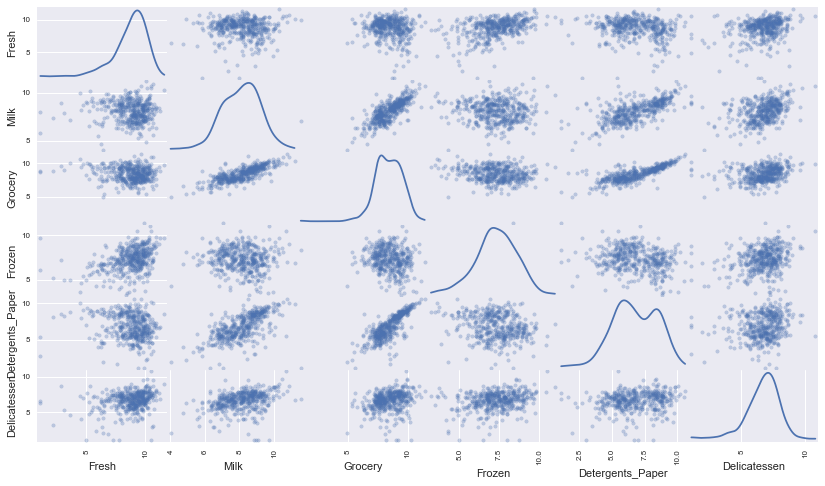

In [36]:
from scipy import stats

# TODO：使用自然对数缩放数据
log_data  = np.log(data)

# TODO：使用自然对数缩放样本数据
log_samples = np.log(samples)

# 为每一对新产生的特征制作一个散射矩阵
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### 观察
在使用了一个自然对数的缩放之后，数据的各个特征会显得更加的正态分布。对于任意的你以前发现有相关关系的特征对，观察他们的相关关系是否还是存在的（并且尝试观察，他们的相关关系相比原来是变强了还是变弱了）。

运行下面的代码以观察样本数据在进行了自然对数转换之后如何改变了。

In [8]:
# 展示经过对数变换后的样本数据
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.737197,8.740337,7.591357,8.900004,4.770685,4.158883
1,8.964823,8.739536,8.786304,8.331827,8.312381,6.871091
2,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446


### 练习: 异常值检测
对于任何的分析，在数据预处理的过程中检测数据中的异常值都是非常重要的一步。异常值的出现会使得把这些值考虑进去后结果出现倾斜。这里有很多关于怎样定义什么是数据集中的异常值的经验法则。这里我们将使用[Tukey的定义异常值的方法](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)：一个*异常阶（outlier step）*被定义成1.5倍的四分位距（interquartile range，IQR）。一个数据点如果某个特征包含在该特征的IQR之外的特征，那么该数据点被认定为异常点。

在下面的代码单元中，你需要完成下面的功能：
 - 将指定特征的25th分位点的值分配给`Q1`。使用`np.percentile`来完成这个功能。
 - 将指定特征的75th分位点的值分配给`Q3`。同样的，使用`np.percentile`来完成这个功能。
 - 将指定特征的异常阶的计算结果赋值给`step`.
 - 选择性地通过将索引添加到`outliers`列表中，以移除异常值。

**注意：** 如果你选择移除异常值，请保证你选择的样本点不在这些移除的点当中！
一旦你完成了这些功能，数据集将存储在`good_data`中。

In [43]:
# 对于每一个特征，找到值异常高或者是异常低的数据点
for feature in log_data.keys():
    
    # TODO：计算给定特征的Q1（数据的25th分位点）
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO：计算给定特征的Q3（数据的75th分位点）
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO：使用四分位范围计算异常阶（1.5倍的四分位距）
    step = (Q3-Q1)*1.5

    # 显示异常点
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# 可选：选择你希望移除的数据点的索引，注意只有一个特征数据异常不认为异常，必须两个特征及以上才是异常
outliers  = []
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature], 25)
    Q3 = np.percentile(log_data[feature], 75)
    step = (Q3-Q1)*1.5
    for i in range(len(log_data)):
        if log_data.loc[i][feature] < Q1 - step or log_data.loc[i][feature] > Q3 + step:
            outliers.append(i)
        
from collections import Counter
outliers_map = Counter(outliers)

outliers  = []
for index,count in outliers_map.items():
    if count > 1: outliers.append(index)
print "will out data ",len(outliers)

# 如果选择了的话，移除异常点
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "good_data len ",len(good_data)

print "2 or more feature is out:"
display(data.loc[outliers])

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
81,219,9540,14403,283,7818,156
95,3,2920,6252,440,223,709
96,23,2616,8118,145,3874,217
128,140,8847,3823,142,1062,3
171,200,25862,19816,651,8773,6250
193,180,3485,20292,959,5618,666
218,18,7504,15205,1285,4797,6372
304,161,7460,24773,617,11783,2410


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,22925,73498,32114,987,20070,903
98,503,112,778,895,56,132
154,622,55,137,75,7,8
356,22686,134,218,3157,9,548


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,20398,1137,3,4407,3,975
154,622,55,137,75,7,8


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,4591,15729,16709,33,6956,433
57,5417,9933,10487,38,7572,1282
65,85,20959,45828,36,24231,1423
145,22039,8384,34792,42,12591,4430
175,2343,7845,11874,52,4196,1697
264,1073,9679,15445,61,5980,1265
325,32717,16784,13626,60869,1272,5609
420,4456,5266,13227,25,6818,1393
429,8607,1750,3580,47,84,2501
439,2787,1698,2510,65,477,52


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,20398,1137,3,4407,3,975
161,12434,540,283,1092,3,2233


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,9,1534,7417,175,3468,27
109,1406,16729,28986,673,836,3
128,140,8847,3823,142,1062,3
137,3087,8080,8282,661,721,36
142,37036,7152,8253,2995,20,3
154,622,55,137,75,7,8
183,36847,43950,20170,36534,239,47943
184,327,918,4710,74,334,11
187,2438,8002,9819,6269,3459,3
203,583,685,2216,469,954,18


will out data  5
good_data len  435
2 or more feature is out:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975


### 问题 4
*请列出所有在多于一个特征下被看作是异常的数据点。这些点应该被从数据集中移除吗？为什么？把你认为需要移除的数据点全部加入到到`outliers`变量中。* 

**回答:** 这些点应该被移除，因为他们不是明显偏大就是明明显偏小，并且会影响后续计算结果和计算性能 <br />
但是只有一个异常特征数据，我们不认为数据异常，因为我们不希望省略很多的点——否则我们的训练样本会很少，导致它可能无法学到正确的内容。<br />
已经把需要移除的数据点加入到了了outliers变量中 <br />
一共需要移除5个点，剩下的点数是435个

## 特征转换
在这个部分中你将使用主成分分析（PCA）来分析批发商客户数据的内在结构。由于使用PCA在一个数据集上会计算出最大化方差的维度，我们将找出哪一个特征组合能够最好的描绘客户。

### 练习: 主成分分析（PCA）

既然数据被缩放到一个更加正态分布的范围中并且我们也移除了需要移除的异常点，我们现在就能够在`good_data`上使用PCA算法以发现数据的哪一个维度能够最大化特征的方差。除了找到这些维度，PCA也将报告每一个维度的*解释方差比（explained variance ratio）*--这个数据有多少方差能够用这个单独的维度来解释。注意PCA的一个组成部分（维度）能够被看做这个空间中的一个新的“特征”，但是它是原来数据中的特征构成的。

在下面的代码单元中，你将要实现下面的功能：
 - 导入`sklearn.decomposition.PCA`并且将`good_data`用PCA并且使用6个维度进行拟合后的结果保存到`pca`中。
 - 使用`pca.transform`将`log_samples`进行转换，并将结果存储到`pca_samples`中。

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


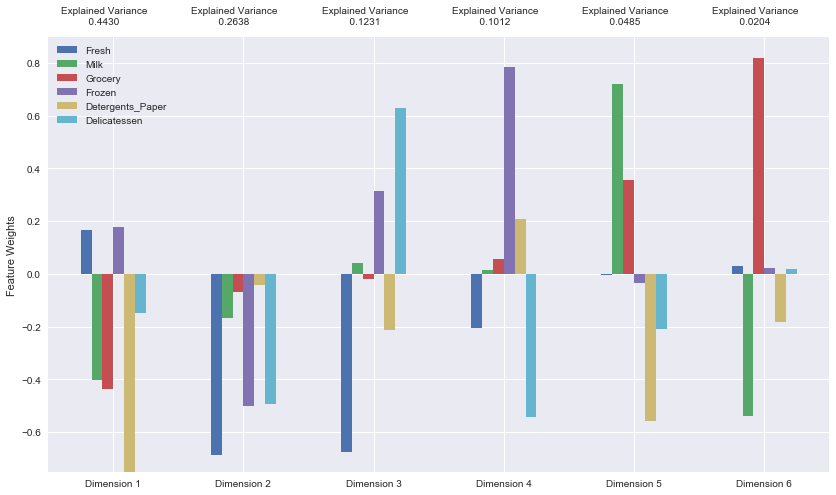

In [65]:
from sklearn.decomposition import PCA

# TODO：通过在good data上使用PCA，将其转换成和当前特征数一样多的维度
pca = PCA(n_components=6).fit(good_data)

# TODO：使用上面的PCA拟合将变换施加在log_samples上
pca_samples = pca.transform(log_samples)

# 生成PCA的结果图
pca_results = vs.pca_results(good_data, pca)

### 问题 5
*数据的第一个和第二个主成分* **总共** *表示了多少的方差？*  前四个主成分呢？使用上面提供的可视化图像，讨论从用户花费的角度来看前四个**主要成分**的消费行为最能代表哪种类型的客户并给出你做出判断的理由。

**提示：** 某一特定维度上的正向增长对应**正权**特征的**增长**和**负权**特征的**减少**。增长和减少的速率和每个特征的权重相关。[参考资料(英文)](https://onlinecourses.science.psu.edu/stat505/node/54)。

**回答:** 从图上看，数据的第一个主成分和第二个主成分的方差是 0.4991+0.2263 = 0.7254, 说明前两个成分包含了大部分信息<br />
前面四个主成分，总共是 0.4991+0.2263+0.1049+0.0977 = 0.928,  说明前四个成分包含了绝大部分信息 <br />

关于这六个主成分的分析，主要看两点，每个特征影响主成分的主要看绝对值，不论是正的还是负的，只要绝对值越大，那么影响就越大；除此之外，要看在每个主成分中，同向的表示有正相关性，即买 A 也意味着倾向于买 B，那么反向的表示有负相关性，也就是买 A 也意味着不倾向于买 B。基于这些信息，后买对四个主要成本进行分析：

- 第一主成本: 可以看出，洗涤纸(Detergents_Paper)是所有特征中对第一主成分影响最大的，且基本接近0.8.另外同时，对牛奶(Milk)和杂物(Grocery)也有正相关性，这数据说明了有些洗涤纸(Detergents_Paper)花费大的客户，很有可能对牛奶(Milk)和杂物(Grocery)也相对大。
- 第二主成分，可以看出，生鲜(Fresh)和冷冻物(Frozen)和熟食(Delicatessen)对第二主成分影响最大，绝对值都大于0.5，并且相互正相关正相关。在这三个特征里面，Fresh的影响是最大的，其绝对值基本上有0.7，这揭示了，有些对生鲜(Fresh)花费大的客户，往往对冷冻物(Frozen)和熟食(Delicatessen)花费也大。
- 第三主成份，可以看出生鲜(Fresh)和熟食(Delicatessen)对第三主成分影响很大，但是和第二个主成分不同，他们是负相关的，其他们的值都接近于0.7比较了。这揭示了，有些熟食Delicatessen花费大的客户,也能可能在熟食(Delicatessen)上花费很小，同时，有些在熟食(Delicatessen)上花费多的客户，在生鲜上(Fresh)上花费很小。
- 第四主成分，可以看出冷冻物(Frozen)和熟食(Delicatessen)对第四主成分影响很大,且是负相关的，这揭示了，有些在冷冻物花费大的客户很可能在熟食上花费很小 


### 观察
运行下面的代码，查看经过对数转换的样本数据在进行一个6个维度的主成分分析（PCA）之后会如何改变。观察样本数据的前四个维度的数值。考虑这和你初始对样本点的解释是否一致。

In [46]:
# 展示经过PCA转换的sample log-datac
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.4824,-0.1562,-1.2838,1.9485,1.7392,-0.6630
1,-1.3392,-0.9169,-0.0080,0.9980,-0.3601,-0.3087
2,1.4269,1.2099,-0.1030,-3.9222,0.6257,0.5211


### 练习：降维
当使用主成分分析的时候，一个主要的目的是减少数据的维度，这实际上降低了问题的复杂度。当然降维也是需要一定代价的：更少的维度能够表示的数据中的总方差更少。因为这个，*累计解释方差比（cumulative explained variance ratio）*对于我们确定这个问题需要多少维度非常重要。另外，如果大部分的方差都能够通过两个或者是三个维度进行表示的话，降维之后的数据能够被可视化。

在下面的代码单元中，你将实现下面的功能：
 - 将`good_data`用两个维度的PCA进行拟合，并将结果存储到`pca`中去。
 - 使用`pca.transform`将`good_data`进行转换，并将结果存储在`reduced_data`中。
 - 使用`pca.transform`将`log_samples`进行转换，并将结果存储在`pca_samples`中。

In [47]:
# TODO：通过在good data上进行PCA，将其转换成两个维度
pca = PCA(n_components=2).fit(good_data)

# TODO：使用上面训练的PCA将good data进行转换
reduced_data = pca.transform(good_data)

# TODO：使用上面训练的PCA将log_samples进行转换
pca_samples = pca.transform(log_samples)

# 为降维后的数据创建一个DataFrame
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### 观察
运行以下代码观察当仅仅使用两个维度进行PCA转换后，这个对数样本数据将怎样变化。观察这里的结果与一个使用六个维度的PCA转换相比较时，前两维的数值是保持不变的。

In [48]:
# 展示经过两个维度的PCA转换之后的样本log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.4824,-0.1562
1,-1.3392,-0.9169
2,1.4269,1.2099


## 可视化一个双标图（Biplot）
双标图是一个散点图，每个数据点的位置由它所在主成分的分数确定。坐标系是主成分（这里是`Dimension 1` 和 `Dimension 2`）。此外，双标图还展示出初始特征在主成分上的投影。一个双标图可以帮助我们理解降维后的数据，发现主成分和初始特征之间的关系。

运行下面的代码来创建一个降维后数据的双标图。

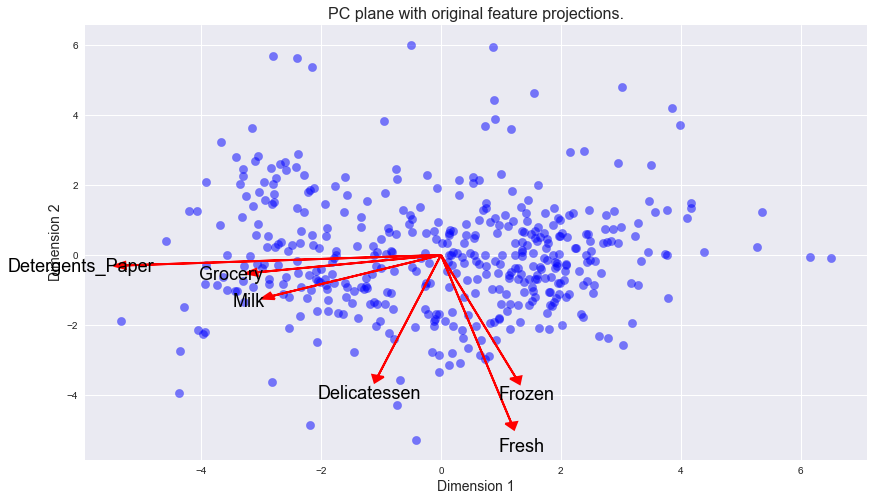

In [51]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### 观察

一旦我们有了原始特征的投影（红色箭头），就能更加容易的理解散点图每个数据点的相对位置。

在这个双标图中，哪些初始特征与第一个主成分有强关联？哪些初始特征与第二个主成分相关联？你观察到的是否与之前得到的 pca_results 图相符？

**回答** 我观察到 Milk,Grocery,Detergents_Paper 和 第一主成分密切相关； Frozon,Fresh和Delicatessen 和 第二住成本 密切相关。这个图和之前的pca_results的图并不相符合

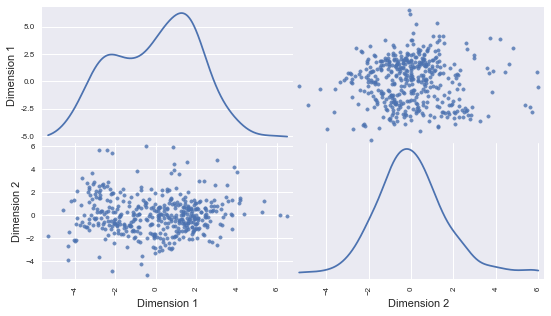

In [52]:
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (9,5), diagonal = 'kde');

下面绘制绘制分布的联合核密度图

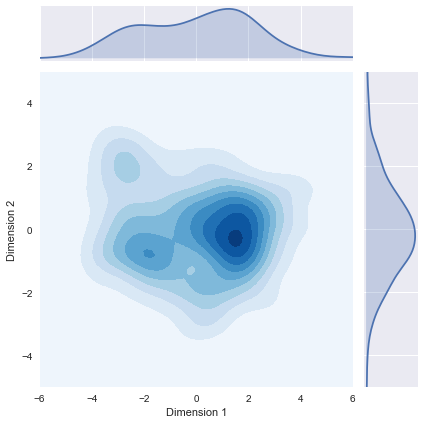

In [53]:
import seaborn as sns
g = sns.JointGrid("Dimension 1", "Dimension 2", reduced_data, xlim=(-6,6), ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True)
g = g.plot_marginals(sns.kdeplot, shade=True)

## 聚类

在这个部分，你讲选择使用K-Means聚类算法或者是高斯混合模型聚类算法以发现数据中隐藏的客户分类。然后，你将从簇中恢复一些特定的关键数据点，通过将它们转换回原始的维度和规模，从而理解他们的含义。

### 问题 6
*使用K-Means聚类算法的优点是什么？使用高斯混合模型聚类算法的优点是什么？基于你现在对客户数据的观察结果，你选用了这两个算法中的哪一个，为什么？*

**回答:**

- 速度和表现：
KMeans和GMM都是效率不高的，且算法复杂度都是大于O^3的，不过相对而言，KMeans在效率上算好的了，GMM算法只有在数据小且每个维度特征符合高斯分布的时候才适合用，GMM在面对大数据量的时候效率会非常非常地底

- 聚类的结果：
KMeans 是硬分类方法，它直接将类别赋给数据点（假设聚类是对称的圆形分布），这样结果不稳定，不同的执行会结果不同
GMM 是软分类方法，它能够给数据点属于不同类的概率，即一个数据点又可以属于这个类，有可以属于那个类，但概率不同。

- 缺陷
KMean的缺陷：1.收敛太慢 2.不能发现非凸形状的簇，或大小差别很大的簇 3.对噪声和异常点非常敏感 4.结果不稳定，同样数据，多次执行，结果可能不同
GMM的缺陷： 1.如果数据特征不正态分布（高斯分布）结果可能很不好 2. 数据量的时候会执行非常非常慢  3.容易出现局部极值

本例的数据在前面的对数话之后，所有特征都基本符合了高斯分布，且数据量小，所以我认为我应该选择GMM高斯混合模型算法。实际请款给我会对比Kmean和GMM的结果。

### 练习: 创建聚类

针对不同情况，有些问题你需要的聚类数目可能是已知的。但是在聚类数目不作为一个**先验**知道的情况下，我们并不能够保证某个聚类的数目对这个数据是最优的，因为我们对于数据的结构（如果存在的话）是不清楚的。但是，我们可以通过计算每一个簇中点的**轮廓系数**来衡量聚类的质量。数据点的[轮廓系数](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)衡量了它与分配给他的簇的相似度，这个值范围在-1（不相似）到1（相似）。**平均**轮廓系数为我们提供了一种简单地度量聚类质量的方法。

在接下来的代码单元中，你将实现下列功能：
 - 在`reduced_data`上使用一个聚类算法，并将结果赋值到`clusterer`，需要设置 `random_state` 使得结果可以复现。
 - 使用`clusterer.predict`预测`reduced_data`中的每一个点的簇，并将结果赋值到`preds`。
 - 使用算法的某个属性值找到聚类中心，并将它们赋值到`centers`。
 - 预测`pca_samples`中的每一个样本点的类别并将结果赋值到`sample_preds`。
 - 导入sklearn.metrics.silhouette_score包并计算`reduced_data`相对于`preds`的轮廓系数。
   - 将轮廓系数赋值给`score`并输出结果。

后面计算一下好的score，看看分为几个族的时候

In [57]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

n_clusters_set = [2,3,4,5,6,7,8,9,10,12,15,18,21,25]
covs = ['full','tied','diag','spherical']

bset_n_clusters = 0
best_cov = ''
best_score = 0.
for n_clusters in n_clusters_set:
    print ""
    for cov in covs:
        # TODO：在降维后的数据上使用你选择的聚类算法
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type=cov, random_state=42).fit(reduced_data)
        # TODO：预测每一个点的簇
        preds = clusterer.predict(reduced_data)
        # TODO：预测在每一个转换后的样本点的类
        sample_preds = clusterer.predict(pca_samples)
        score = silhouette_score(reduced_data, preds)
        print "GMM when n_clusters is ", n_clusters, "and covariance_type=", cov, " silhouette_score is ",score
        if score > best_score:
            bset_n_clusters, best_cov, best_score = n_clusters, cov, score
print ""
print "GMM best score is ",best_score," when n_clusers is ",bset_n_clusters, " and covariance_type=", best_cov
    


GMM when n_clusters is  2 and covariance_type= full  silhouette_score is  0.421916846463
GMM when n_clusters is  2 and covariance_type= tied  silhouette_score is  0.423247676845
GMM when n_clusters is  2 and covariance_type= diag  silhouette_score is  0.423749469869
GMM when n_clusters is  2 and covariance_type= spherical  silhouette_score is  0.423888186214

GMM when n_clusters is  3 and covariance_type= full  silhouette_score is  0.404248738241
GMM when n_clusters is  3 and covariance_type= tied  silhouette_score is  0.383170009328
GMM when n_clusters is  3 and covariance_type= diag  silhouette_score is  0.406653824757
GMM when n_clusters is  3 and covariance_type= spherical  silhouette_score is  0.402378192815

GMM when n_clusters is  4 and covariance_type= full  silhouette_score is  0.293269564847
GMM when n_clusters is  4 and covariance_type= tied  silhouette_score is  0.307264076915
GMM when n_clusters is  4 and covariance_type= diag  silhouette_score is  0.316259647997
GMM when

后面尝试一下KMeans算法

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_set = [2,3,4,5,6,7,8,9,10,12,15,18,21,25]
bset_n_clusters = 0
best_score = 0.
for n_clusters in n_clusters_set:
    # TODO：在降维后的数据上使用你选择的聚类算法
    clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(reduced_data)
    # TODO：预测每一个点的簇
    preds = clusterer.predict(reduced_data)
    # TODO：预测在每一个转换后的样本点的类
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data, preds)
    print "KMeans when n_clusters is ", n_clusters," silhouette_score is ",score
    if score > best_score:
        bset_n_clusters, best_score = n_clusters, score
print ""
print "KMeans best score is ",best_score," when n_clusers is ",bset_n_clusters

KMeans when n_clusters is  2  silhouette_score is  0.426281015469
KMeans when n_clusters is  3  silhouette_score is  0.39689092645
KMeans when n_clusters is  4  silhouette_score is  0.331841276009
KMeans when n_clusters is  5  silhouette_score is  0.349997797526
KMeans when n_clusters is  6  silhouette_score is  0.365885220633
KMeans when n_clusters is  7  silhouette_score is  0.364801207979
KMeans when n_clusters is  8  silhouette_score is  0.367640756491
KMeans when n_clusters is  9  silhouette_score is  0.359879014605
KMeans when n_clusters is  10  silhouette_score is  0.364155280516
KMeans when n_clusters is  12  silhouette_score is  0.348828710466
KMeans when n_clusters is  15  silhouette_score is  0.348339651877
KMeans when n_clusters is  18  silhouette_score is  0.357069126937
KMeans when n_clusters is  21  silhouette_score is  0.341930873169
KMeans when n_clusters is  25  silhouette_score is  0.34758423946

KMeans best score is  0.426281015469  when n_clusers is  2


Keans 得到也是 n_clusters==2 的时候效果最最高，但同样是2的前提下，但是kmean的score要稍稍好于GMM，这我之前想象的有些差异，不过后面还是尊重从理论上分析的分解，最终还是选择用GMM的n_clusters=2为最终计算模型

In [59]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO：在降维后的数据上使用你选择的聚类算法
clusterer = GaussianMixture(n_components=2, covariance_type='spherical', random_state=42).fit(reduced_data)

# TODO：预测每一个点的簇
preds = clusterer.predict(reduced_data)

# TODO：找到聚类中心
centers = clusterer.means_ 

# TODO：预测在每一个转换后的样本点的类
sample_preds = clusterer.predict(pca_samples)
print "sample_preds is ",sample_preds

# TODO：计算选择的类别的平均轮廓系数（mean silhouette coefficient）
score = silhouette_score(reduced_data, preds)
print "silhouette_score is ",score

sample_preds is  [0 1 0]
silhouette_score is  0.423888186214


### 问题 7

*汇报你尝试的不同的聚类数对应的轮廓系数。在这些当中哪一个聚类的数目能够得到最佳的轮廓系数？* 

**回答:** 如上具体的计算过程，选择GMM算法，在聚类数目为2的时候，能得到最佳的轮廓系数

### 聚类可视化
一旦你选好了通过上面的评价函数得到的算法的最佳聚类数目，你就能够通过使用下面的代码块可视化来得到的结果。作为实验，你可以试着调整你的聚类算法的聚类的数量来看一下不同的可视化结果。但是你提供的最终的可视化图像必须和你选择的最优聚类数目一致。

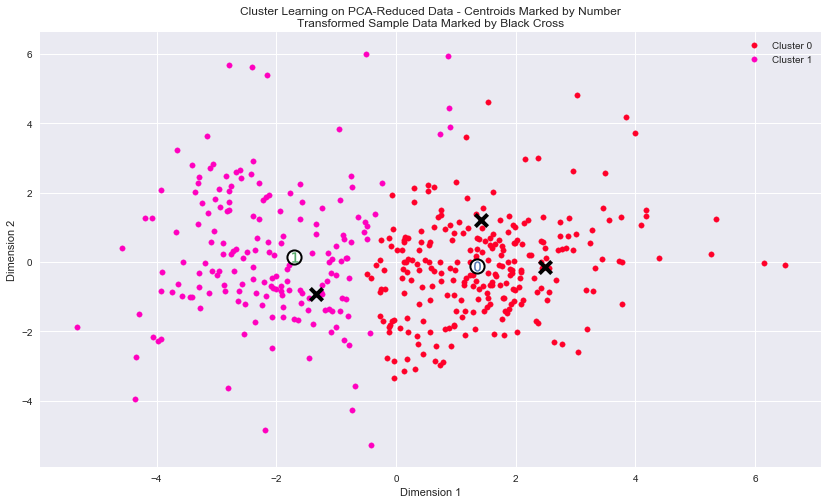

In [60]:
# 从已有的实现中展示聚类的结果
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### 练习: 数据恢复
上面的可视化图像中提供的每一个聚类都有一个中心点。这些中心（或者叫平均点）并不是数据中真实存在的点，但是是所有预测在这个簇中的数据点的*平均*。对于创建客户分类的问题，一个簇的中心对应于*那个分类的平均用户*。因为这个数据现在进行了降维并缩放到一定的范围，我们可以通过施加一个反向的转换恢复这个点所代表的用户的花费。

在下面的代码单元中，你将实现下列的功能：
 - 使用`pca.inverse_transform`将`centers` 反向转换，并将结果存储在`log_centers`中。
 - 使用`np.log`的反函数`np.exp`反向转换`log_centers`并将结果存储到`true_centers`中。


In [61]:
# TODO：反向转换中心点
log_centers = pca.inverse_transform(centers)

# TODO：对中心点做指数转换
true_centers = np.exp(log_centers)   #因为前面我都+1之后再取log的

# 显示真实的中心点
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8716.0,2003.0,2627.0,2047.0,325.0,698.0
Segment 1,4374.0,6547.0,9846.0,1043.0,3198.0,971.0


### 问题 8
考虑上面的代表性数据点在每一个产品类型的花费总数，*你认为这些客户分类代表了哪类客户？为什么？*需要参考在项目最开始得到的统计值来给出理由。

**提示：** 一个被分到`'Cluster X'`的客户最好被用 `'Segment X'`中的特征集来标识的企业类型表示。

**回答:** 这里对比前面的统计数值，中位数，以及Q1，Q3以及平均数，大致可以看出

- 聚类0: Fresh接近中位数;Milk小于中位数;Grocery接近4分位;Froze大于中位数;Detergents_Paper接近4分位;Delicatessen小于中位数
- 聚类1: Fresh接近4分位;Milk接近3/4分位;Grocery大于3/4分位;Froze接近4分数;Detergents_Paper大于3/4分位;Delicatessen接近中位数

也就是说

- 聚类0：更多购买生鲜Fresh和冷冻物Frzon,且杂物Grocery，洗涤纸Detergents_Paper购买得很少，看样子像是大型生鲜超市之类的吧
- 聚类1：大量购买牛奶Milk,杂物Grocery，洗涤纸Detergents_Paper, 看样子像是零售之类的客户吧

### 问题 9
*对于每一个样本点 * **问题 8**  *中的哪一个分类能够最好的表示它？你之前对样本的预测和现在的结果相符吗？*

运行下面的代码单元以找到每一个样本点被预测到哪一个簇中去。

In [62]:
# 显示预测结果
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**回答:** 经过预测，可以得出 point0 是 “大型生鲜超市之类” 我预测正确；point1是“零售之类”，我之前预测试是“海鲜餐厅”差不多也正确吧；point2是“大型生鲜超市之类” 我之前预测试“零售”，和我之前预测结果不相符合。
       

## 结论

在最后一部分中，你要学习如何使用已经被分类的数据。首先，你要考虑不同组的客户**客户分类**，针对不同的派送策略受到的影响会有什么不同。其次，你要考虑到，每一个客户都被打上了标签（客户属于哪一个分类）可以给客户数据提供一个多一个特征。最后，你会把客户分类与一个数据中的隐藏变量做比较，看一下这个分类是否辨识了特定的关系。

### 问题 10
在对他们的服务或者是产品做细微的改变的时候，公司经常会使用[A/B tests](https://en.wikipedia.org/wiki/A/B_testing)以确定这些改变会对客户产生积极作用还是消极作用。这个批发商希望考虑将他的派送服务从每周5天变为每周3天，但是他只会对他客户当中对此有积极反馈的客户采用。*这个批发商应该如何利用客户分类来知道哪些客户对它的这个派送策略的改变有积极的反馈，如果有的话？*  
**提示** 我们能假设这个改变对所有的客户影响都一致吗？我们怎样才能够确定它对于哪个类型的客户影响最大？

**回答：** 从直观上讲，如果要测试一些商业策略，我认为确实应该却分聚类0和聚类1来分别测试，因为用户群体不同，反应的情况可能不同。例如这里供货，从每周5天变成每周3天，可能会导致聚类0客户的方案因为聚类主要买生鲜，不能接受送货周期变长。但是对于聚类1客户来说，他们买杂货为主，时间变长也不是太坏的事情，送货周期没有那么重要，可能会产生积极的影响。

### 问题 11
通过聚类技术，我们能够将原有的没有标记的数据集中的附加结构分析出来。因为每一个客户都有一个最佳的划分（取决于你选择使用的聚类算法），我们可以把*用户分类*作为数据的一个[**工程特征**](https://en.wikipedia.org/wiki/Feature_learning#Unsupervised_feature_learning)。假设批发商最近迎来十位新顾客，并且他已经为每位顾客每个产品类别年度采购额进行了预估。进行了这些估算之后，批发商该如何运用它的预估和**非监督学习的结果**来对这十个新的客户进行更好的预测？

**提示：**在下面的代码单元中，我们提供了一个已经做好聚类的数据（聚类结果为数据中的cluster属性），我们将在这个数据集上做一个小实验。尝试运行下面的代码看看我们尝试预测‘Region’的时候，如果存在聚类特征'cluster'与不存在相比对最终的得分会有什么影响？这对你有什么启发？

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 读取包含聚类结果的数据
cluster_data = pd.read_csv("cluster.csv")
y = cluster_data['Region']
X = cluster_data.drop(['Region'], axis = 1)

# 划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24)

clf = RandomForestClassifier(random_state=24)
clf.fit(X_train, y_train)
print "使用cluster特征的得分", clf.score(X_test, y_test)

# 移除cluster特征
X_train = X_train.copy()
X_train_only_cluster = X_train['cluster']
X_test = X_test.copy()
X_test_only_cluster = X_test['cluster']
clf.fit(X_train, y_train)
print "不使用cluster特征的得分", clf.score(X_test, y_test)

使用cluster特征的得分 0.666666666667
不使用cluster特征的得分 0.666666666667


**回答：** 从运行的结果看，使用cluster特性的得分等于 不使用cluster。 但我之前曾经尝试过过滤掉只有一个特征数据异常的数据，在那次的尝试中，发现使用clustert的特征得分大于不适用cluster的得分，所以，直接从数据表面获得的信息往往隐藏了更加重要和更加直接的信息，把这些隐藏的信息挖掘出来，对预测的帮助也许很大。

### 可视化内在的分布

在这个项目的开始，我们讨论了从数据集中移除`'Channel'`和`'Region'`特征，这样在分析过程中我们就会着重分析用户产品类别。通过重新引入`Channel`这个特征到数据集中，并施加和原来数据集同样的PCA变换的时候我们将能够发现数据集产生一个有趣的结构。

运行下面的代码单元以查看哪一个数据点在降维的空间中被标记为`'HoReCa'` (旅馆/餐馆/咖啡厅)或者`'Retail'`。另外，你将发现样本点在图中被圈了出来，用以显示他们的标签。

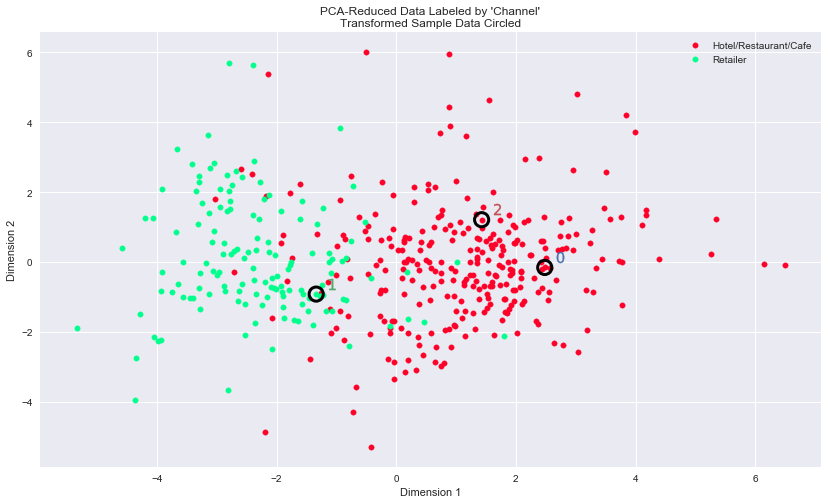

In [64]:
# 根据‘Channel‘数据显示聚类的结果
vs.channel_results(reduced_data, outliers, pca_samples)

### 问题 12

*你选择的聚类算法和聚类点的数目和内在的旅馆/餐馆/咖啡店 分布相比足够好吗？根据这个分布有没有哪个簇能够刚好划分成'零售商'或者是'旅馆/饭店/咖啡馆'？你觉得这个分类和前面你对于用户分类的定义是一致的吗？*

**回答：** 仔细对我自己用机器学习的分类和本身的归类来看，大体上是一致的，基本布局和形状是差不多的，但是有个别的节点是不同的。因为红色和绿色有些交叉。我选择的聚类算法和聚类点数还是基本不错的，但是不是足够好。或许，是不是可以对餐厅进行细分，餐厅有大有小，大的可能非常大，大到生鲜超市级别，小的的可以小到零售级别。这个归类和我对用户的归类似乎并不一致。

> **注意**: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。  